<a href="https://colab.research.google.com/github/lordpiyush938/CVIP-DataScience/blob/main/email_spam_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Email Spam Detection

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
#Import Libraries

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import pickle
from sklearn.tree import plot_tree
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB, MultinomialNB
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, ExtraTreesClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score, confusion_matrix, ConfusionMatrixDisplay, classification_report
import os
for dirname, _, filenames in os.walk('/content/drive/MyDrive/Colab Notebooks/emails.csv'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
import warnings
warnings.filterwarnings("ignore")

In [4]:
#Load Data
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/emails.csv')
df.head(10)

,Email No.,the,to,ect,and,for,of,a,you,hou,...,connevey,jay,valued,lay,infrastructure,military,allowing,ff,dry,Prediction
0,Email 1,0,0,1,0,0,0,2,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Email 2,8,13,24,6,6,2,102,1,27,...,0,0,0,0,0,0,0,1,0,0
2,Email 3,0,0,1,0,0,0,8,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Email 4,0,5,22,0,5,1,51,2,10,...,0,0,0,0,0,0,0,0,0,0
4,Email 5,7,6,17,1,5,2,57,0,9,...,0,0,0,0,0,0,0,1,0,0
5,Email 6,4,5,1,4,2,3,45,1,0,...,0,0,0,0,0,0,0,0,0,1
6,Email 7,5,3,1,3,2,1,37,0,0,...,0,0,0,0,0,0,0,0,0,0
7,Email 8,0,2,2,3,1,2,21,6,0,...,0,0,0,0,0,0,0,1,0,1
8,Email 9,2,2,3,0,0,1,18,0,0,...,0,0,0,0,0,0,0,0,0,0
9,Email 10,4,4,35,0,1,0,49,1,16,...,0,0,0,0,0,0,0,0,0,0


# Data Cleaning & Visualization

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5172 entries, 0 to 5171
Columns: 3002 entries, Email No. to Prediction
dtypes: int64(3001), object(1)
memory usage: 118.5+ MB


In [6]:
df.isnull().sum()

Email No.     0
the           0
to            0
ect           0
and           0
             ..
military      0
allowing      0
ff            0
dry           0
Prediction    0
Length: 3002, dtype: int64

In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
the,5172.0,6.640565,11.745009,0.0,0.0,3.0,8.0,210.0
to,5172.0,6.188128,9.534576,0.0,1.0,3.0,7.0,132.0
ect,5172.0,5.143852,14.101142,1.0,1.0,1.0,4.0,344.0
and,5172.0,3.075599,6.045970,0.0,0.0,1.0,3.0,89.0
for,5172.0,3.124710,4.680522,0.0,1.0,2.0,4.0,47.0
...,...,...,...,...,...,...,...,...
military,5172.0,0.006574,0.138908,0.0,0.0,0.0,0.0,4.0
allowing,5172.0,0.004060,0.072145,0.0,0.0,0.0,0.0,3.0
ff,5172.0,0.914733,2.780203,0.0,0.0,0.0,1.0,114.0
dry,5172.0,0.006961,0.098086,0.0,0.0,0.0,0.0,4.0


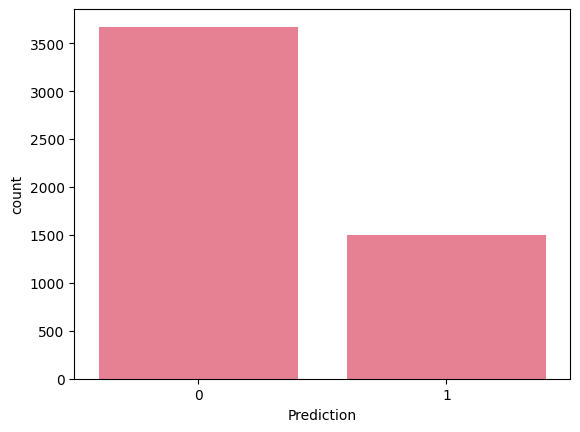

In [8]:
sns.countplot(data=df, x='Prediction', color=sns.color_palette("husl", 8)[0])
plt.show()

In [9]:
df = df.iloc[:, 1:]

In [10]:
df

,the,to,ect,and,for,of,a,you,hou,in,...,connevey,jay,valued,lay,infrastructure,military,allowing,ff,dry,Prediction
0,0,0,1,0,0,0,2,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,8,13,24,6,6,2,102,1,27,18,...,0,0,0,0,0,0,0,1,0,0
2,0,0,1,0,0,0,8,0,0,4,...,0,0,0,0,0,0,0,0,0,0
3,0,5,22,0,5,1,51,2,10,1,...,0,0,0,0,0,0,0,0,0,0
4,7,6,17,1,5,2,57,0,9,3,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5167,2,2,2,3,0,0,32,0,0,5,...,0,0,0,0,0,0,0,0,0,0
5168,35,27,11,2,6,5,151,4,3,23,...,0,0,0,0,0,0,0,1,0,0
5169,0,0,1,1,0,0,11,0,0,1,...,0,0,0,0,0,0,0,0,0,1
5170,2,7,1,0,2,1,28,2,0,8,...,0,0,0,0,0,0,0,1,0,1


In [11]:
x = df.iloc[:, :3000]
x

,the,to,ect,and,for,of,a,you,hou,in,...,enhancements,connevey,jay,valued,lay,infrastructure,military,allowing,ff,dry
0,0,0,1,0,0,0,2,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,8,13,24,6,6,2,102,1,27,18,...,0,0,0,0,0,0,0,0,1,0
2,0,0,1,0,0,0,8,0,0,4,...,0,0,0,0,0,0,0,0,0,0
3,0,5,22,0,5,1,51,2,10,1,...,0,0,0,0,0,0,0,0,0,0
4,7,6,17,1,5,2,57,0,9,3,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5167,2,2,2,3,0,0,32,0,0,5,...,0,0,0,0,0,0,0,0,0,0
5168,35,27,11,2,6,5,151,4,3,23,...,0,0,0,0,0,0,0,0,1,0
5169,0,0,1,1,0,0,11,0,0,1,...,0,0,0,0,0,0,0,0,0,0
5170,2,7,1,0,2,1,28,2,0,8,...,0,0,0,0,0,0,0,0,1,0


In [12]:
x = x.values
x

array([[ 0,  0,  1, ...,  0,  0,  0],
       [ 8, 13, 24, ...,  0,  1,  0],
       [ 0,  0,  1, ...,  0,  0,  0],
       ...,
       [ 0,  0,  1, ...,  0,  0,  0],
       [ 2,  7,  1, ...,  0,  1,  0],
       [22, 24,  5, ...,  0,  0,  0]])

In [13]:
y = df.iloc[:, -1]
y

0       0
1       0
2       0
3       0
4       0
       ..
5167    0
5168    0
5169    1
5170    1
5171    0
Name: Prediction, Length: 5172, dtype: int64

In [14]:
y = y.values
y

array([0, 0, 0, ..., 1, 1, 0])

In [15]:
# Train & Test Splitting the Data

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1)

In [16]:
# Function to Measure Performance

def perform(y_pred):
    print("Precision : ", precision_score(y_test, y_pred))
    print("Recall : ", recall_score(y_test, y_pred))
    print("Accuracy : ", accuracy_score(y_test, y_pred))
    print("F1 Score : ", f1_score(y_test, y_pred))
    print('')
    print(confusion_matrix(y_test, y_pred), '\n')
    cm = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test, y_pred))
    cm.plot()

# Logistic Regression

In [17]:
model_lr = LogisticRegression()
model_lr.fit(x_train, y_train)

LogisticRegression()

In [18]:
y_pred_lr = model_lr.predict(x_test)

Precision :  0.9369085173501577
Recall :  0.939873417721519
Accuracy :  0.9623188405797102
F1 Score :  0.938388625592417

[[699  20]
 [ 19 297]] 



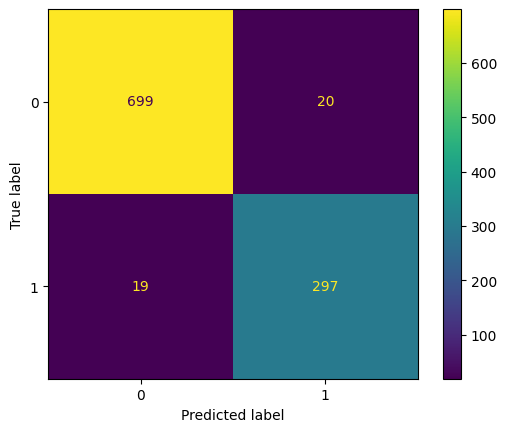

In [19]:
perform(y_pred_lr)

In [20]:
print(classification_report(y_test, y_pred_lr))

              precision    recall  f1-score   support

           0       0.97      0.97      0.97       719
           1       0.94      0.94      0.94       316

    accuracy                           0.96      1035
   macro avg       0.96      0.96      0.96      1035
weighted avg       0.96      0.96      0.96      1035



# Support Vector Clasifier

In [21]:
model_svc = SVC()
model_svc.fit(x_train, y_train)

SVC()

In [22]:
y_pred_svc = model_svc.predict(x_test)

Precision :  0.8698630136986302
Recall :  0.40189873417721517
Accuracy :  0.7990338164251207
F1 Score :  0.5497835497835497

[[700  19]
 [189 127]] 



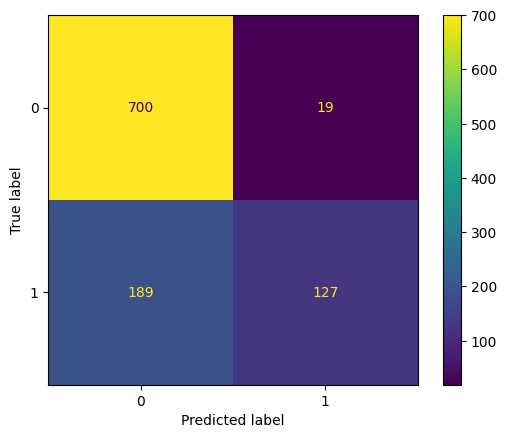

In [23]:
perform(y_pred_svc)

In [24]:
print(classification_report(y_test, y_pred_svc))

              precision    recall  f1-score   support

           0       0.79      0.97      0.87       719
           1       0.87      0.40      0.55       316

    accuracy                           0.80      1035
   macro avg       0.83      0.69      0.71      1035
weighted avg       0.81      0.80      0.77      1035



# Gaussian Naive Bayes

In [25]:
model_nb = GaussianNB()
model_nb.fit(x_train, y_train)

GaussianNB()

In [26]:
y_pred_nb = model_nb.predict(x_test)

Precision :  0.9096385542168675
Recall :  0.9556962025316456
Accuracy :  0.957487922705314
F1 Score :  0.9320987654320988

[[689  30]
 [ 14 302]] 



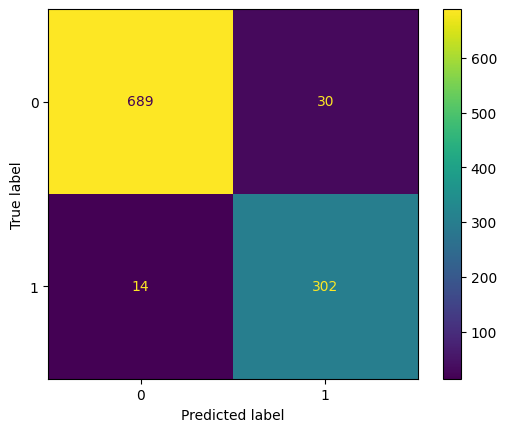

In [27]:
perform(y_pred_nb)

In [28]:
print(classification_report(y_test, y_pred_nb))

              precision    recall  f1-score   support

           0       0.98      0.96      0.97       719
           1       0.91      0.96      0.93       316

    accuracy                           0.96      1035
   macro avg       0.94      0.96      0.95      1035
weighted avg       0.96      0.96      0.96      1035



# Multinomial Naive Bayes

In [29]:
model_mnb = MultinomialNB()
model_mnb.fit(x_train, y_train)

MultinomialNB()

In [30]:
y_pred_mnb = model_mnb.predict(x_test)

Precision :  0.869942196531792
Recall :  0.9525316455696202
Accuracy :  0.9420289855072463
F1 Score :  0.9093655589123867

[[674  45]
 [ 15 301]] 



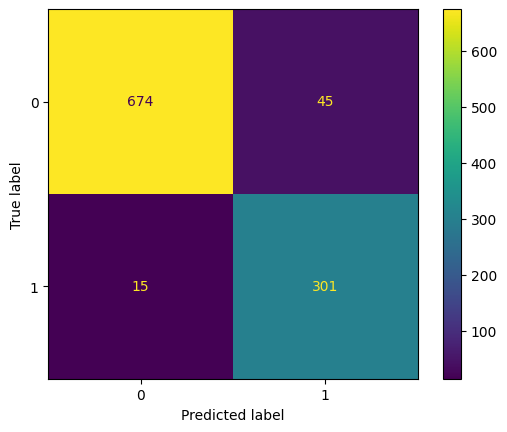

In [31]:
perform(y_pred_mnb)

In [32]:
print(classification_report(y_test, y_pred_mnb))

              precision    recall  f1-score   support

           0       0.98      0.94      0.96       719
           1       0.87      0.95      0.91       316

    accuracy                           0.94      1035
   macro avg       0.92      0.94      0.93      1035
weighted avg       0.95      0.94      0.94      1035



# XGBoost Classifier

In [33]:
xgb = XGBClassifier().fit(x_train, y_train)

In [34]:
y_pred_xgb = xgb.predict(x_test)

Precision :  0.9529780564263323
Recall :  0.9620253164556962
Accuracy :  0.9739130434782609
F1 Score :  0.95748031496063

[[704  15]
 [ 12 304]] 



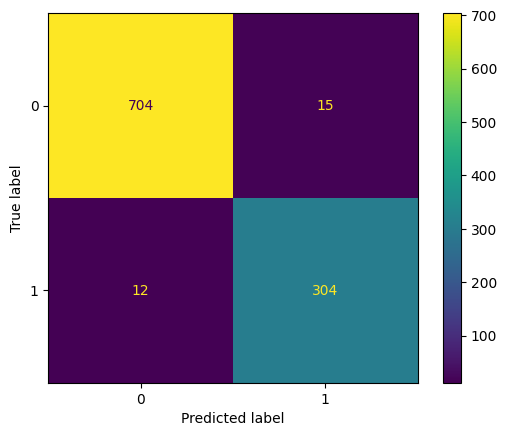

In [35]:
perform(y_pred_xgb)

In [36]:
print(classification_report(y_test, y_pred_xgb))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98       719
           1       0.95      0.96      0.96       316

    accuracy                           0.97      1035
   macro avg       0.97      0.97      0.97      1035
weighted avg       0.97      0.97      0.97      1035



# ADABoost Classifier

In [37]:
model_ada = AdaBoostClassifier()
model_ada.fit(x_train, y_train)

AdaBoostClassifier()

In [38]:
y_pred_ada = model_ada.predict(x_test)

Precision :  0.9339622641509434
Recall :  0.939873417721519
Accuracy :  0.961352657004831
F1 Score :  0.9369085173501578

[[698  21]
 [ 19 297]] 



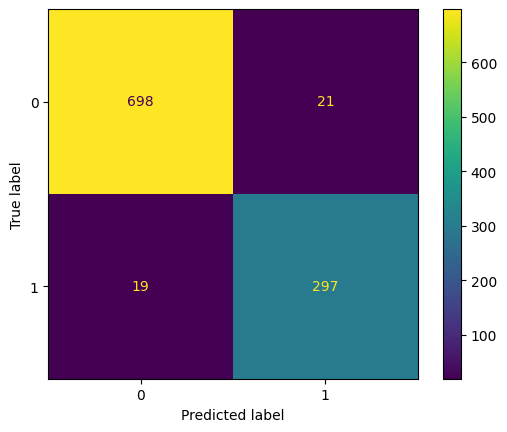

In [39]:
perform(y_pred_ada)

In [40]:
print(classification_report(y_test, y_pred_ada))

              precision    recall  f1-score   support

           0       0.97      0.97      0.97       719
           1       0.93      0.94      0.94       316

    accuracy                           0.96      1035
   macro avg       0.95      0.96      0.95      1035
weighted avg       0.96      0.96      0.96      1035



# Extra Trees Classifier

In [41]:
model_etc = ExtraTreesClassifier()
model_etc.fit(x_train, y_train)

ExtraTreesClassifier()

In [42]:
y_pred_etc = model_etc.predict(x_test)

Precision :  0.9743589743589743
Recall :  0.9620253164556962
Accuracy :  0.9806763285024155
F1 Score :  0.9681528662420382

[[711   8]
 [ 12 304]] 



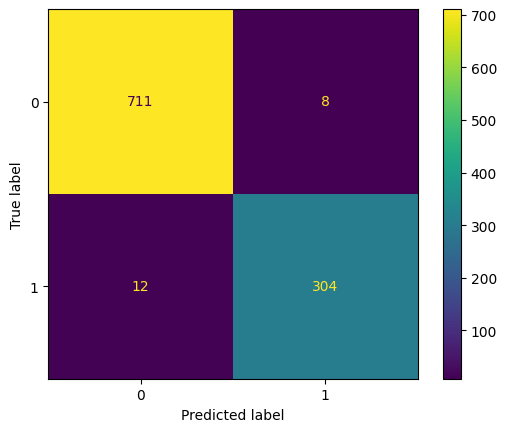

In [43]:
perform(y_pred_etc)

In [44]:
print(classification_report(y_test, y_pred_etc))

              precision    recall  f1-score   support

           0       0.98      0.99      0.99       719
           1       0.97      0.96      0.97       316

    accuracy                           0.98      1035
   macro avg       0.98      0.98      0.98      1035
weighted avg       0.98      0.98      0.98      1035



# Decision Tree

In [45]:
model_dt = DecisionTreeClassifier()
model_dt.fit(x_train, y_train)

DecisionTreeClassifier()

In [46]:
y_pred_dt = model_dt.predict(x_test)

Precision :  0.9018987341772152
Recall :  0.9018987341772152
Accuracy :  0.9400966183574879
F1 Score :  0.9018987341772152

[[688  31]
 [ 31 285]] 



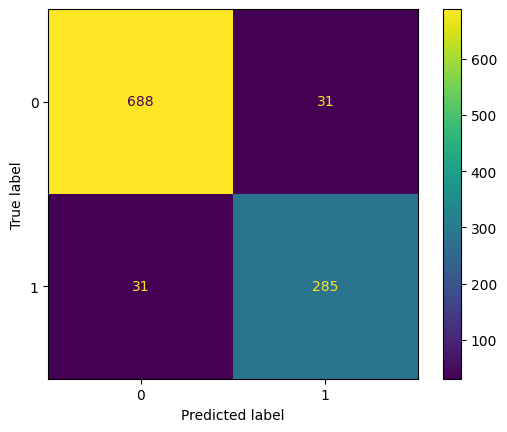

In [47]:
perform(y_pred_dt)

In [48]:
print(classification_report(y_test, y_pred_dt))

              precision    recall  f1-score   support

           0       0.96      0.96      0.96       719
           1       0.90      0.90      0.90       316

    accuracy                           0.94      1035
   macro avg       0.93      0.93      0.93      1035
weighted avg       0.94      0.94      0.94      1035



# Random Forest

In [49]:
model_rf = RandomForestClassifier()
model_rf.fit(x_train, y_train)

RandomForestClassifier()

In [50]:
y_pred_rf = model_rf.predict(x_test)

Precision :  0.9675324675324676
Recall :  0.9430379746835443
Accuracy :  0.9729468599033816
F1 Score :  0.9551282051282052

[[709  10]
 [ 18 298]] 



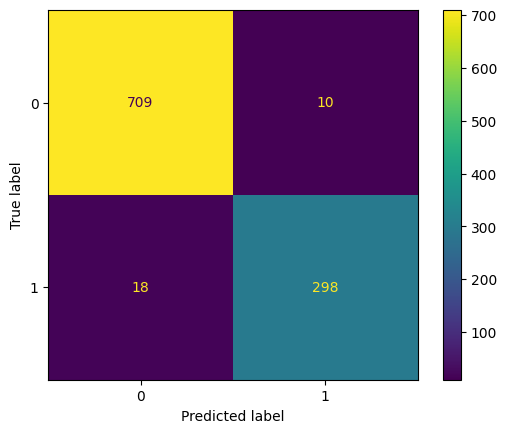

In [51]:
perform(y_pred_rf)

In [52]:
print(classification_report(y_test, y_pred_rf))

              precision    recall  f1-score   support

           0       0.98      0.99      0.98       719
           1       0.97      0.94      0.96       316

    accuracy                           0.97      1035
   macro avg       0.97      0.96      0.97      1035
weighted avg       0.97      0.97      0.97      1035



# Multi-Layer Perceptron Classifier

In [53]:
model_mlp = MLPClassifier()
model_mlp.fit(x_train, y_train)

MLPClassifier()

In [54]:
y_pred_mlp = model_mlp.predict(x_test)

Precision :  0.9510703363914373
Recall :  0.9841772151898734
Accuracy :  0.9797101449275363
F1 Score :  0.9673405909797823

[[703  16]
 [  5 311]] 



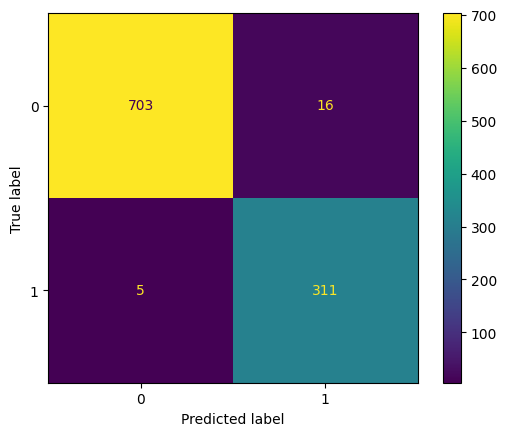

In [55]:
perform(y_pred_mlp)

In [56]:
print(classification_report(y_test, y_pred_mlp))

              precision    recall  f1-score   support

           0       0.99      0.98      0.99       719
           1       0.95      0.98      0.97       316

    accuracy                           0.98      1035
   macro avg       0.97      0.98      0.98      1035
weighted avg       0.98      0.98      0.98      1035



In [57]:
# Saving the Model

pickle.dump(model_mlp, open('EmailSpamDetection-TrainedModel.pkl', 'wb'))

In [58]:
# Prediction Using the Saved Model
pickled_model = pickle.load(open('EmailSpamDetection-TrainedModel.pkl','rb'))
pickled_model.predict(x_test)

array([0, 1, 0, ..., 0, 0, 0])